# Neural Networks II b

# MNIST Dataset con Capas convolucionales

Vamos a resolver el mismo dataset, pero empleando capas convolucionales, que son las que se suelen usar en problemas de visión artificial para el procesamiento de imágenes.

Comenzamos importando los paquetes necesarios, esta vez añadiendo más tipos de capas:

In [2]:
import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Cargamos los datos y los preprocesamos. Para ello, en esta ocasión, vamos a modificar los datos x haciendo un .reshape() para que tengan la forma de una imagen, y normalizamos los valores de los píxeles dividiendo por 255.

Aunque en los datos originales la forma ya es (28, 28), hacemos un reshape a (-1, 28, 28, 1) para que los datos tengan la forma de una imagen, con 1 canal (escala de grises). Si los datos tuvieran 3 canales (RGB), la forma sería (-1, 28, 28, 3). El primer -1 indica que el tamaño de esa dimensión se calcula automáticamente para que el número total de elementos sea el mismo que en la forma original; y hace referencia a el tamaño del batch.

In [3]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Imprimimos la forma de los datos
print('Shape:', x_train[0].shape)

Shape: (28, 28, 1)


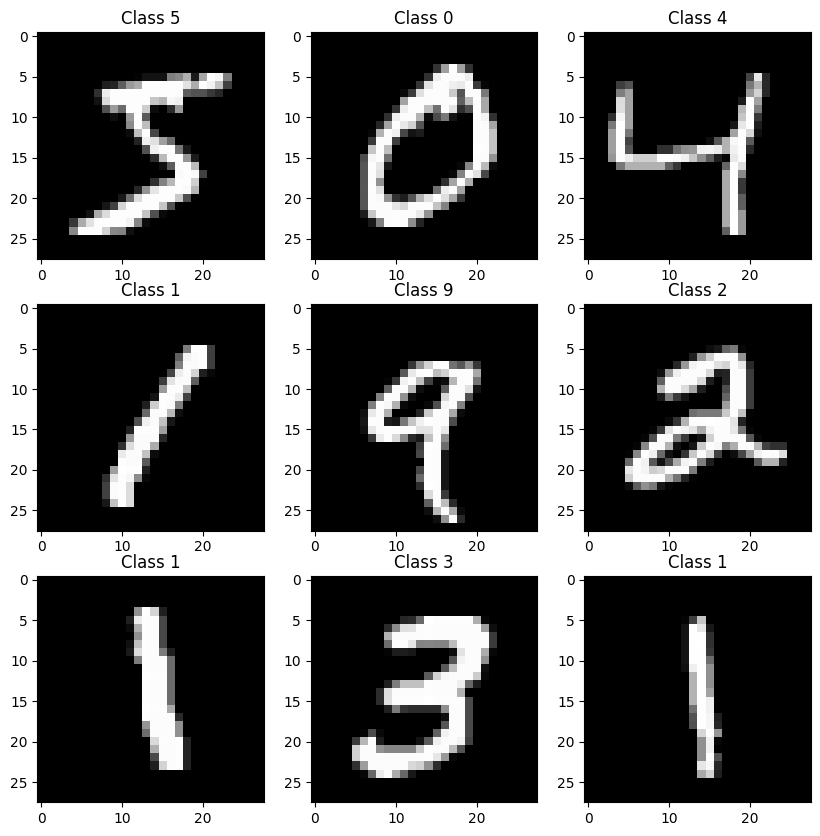

In [4]:
# Visualizamos algunos ejemplos del conjunto de datos
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i].argmax()))

Pasamos a crear el modelo:

In [5]:
# Crear el modelo CNN
model = Sequential()

# Capa convolucional 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa completamente conectada
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(10, activation='softmax'))

Al definir el nuevo modelo, hemos seguido la siguiente estructura:
1. Capa convolucional con 32 filtros de tamaño 3x3, con función de activación ReLU. La capa convolucional tiene 32 filtros o kernels, lo que significa que la salida de la capa tendrá 32 canales. El tamaño de salida de cada filtro es 26x26, ya que el tamaño de la imagen es 28x28 y el tamaño del filtro es 3x3. El tamaño de salida de la capa es (None, 26, 26, 32), donde None es el tamaño del batch.
2. Capa MaxPooling2D con tamaño de ventana 2x2. El tamaño de salida de la capa es (None, 13, 13, 32).
3. Capa convolucional con 64 filtros de tamaño 3x3, con función de activación ReLU. El tamaño de salida de cada filtro es 11x11, ya que el tamaño de la imagen es 13x13 y el tamaño del filtro es 3x3. El tamaño de salida de la capa es (None, 11, 11, 64).
4. Capa MaxPooling2D con tamaño de ventana 2x2. El tamaño de salida de la capa es (None, 5, 5, 64).
5. Capa Flatten, que transforma la salida de la capa anterior en un vector de 1600 elementos (5x5x64).
6. Capa Dense con 128 neuronas y función de activación ReLU.
7. Capa de salida con 10 neuronas y función de activación softmax. El tamaño de salida es igual al número de clases, 10 en este caso. La función softmax transforma un vector de números reales en un vector de la misma longitud, donde cada elemento está en el rango [0, 1] y la suma de todos los elementos es 1. El valor de cada elemento representa la probabilidad de que la entrada pertenezca a la clase correspondiente.

Está estructura de capas causará lo siguiente:
- La primera capa convolucional extraerá 32 características de la imagen de entrada.
- La segunda capa MaxPooling2D reducirá el tamaño de la imagen a la mitad, manteniendo las características más importantes.
- La tercera capa convolucional extraerá 64 características de la imagen de entrada.
- La cuarta capa MaxPooling2D reducirá el tamaño de la imagen a la mitad, manteniendo las características más importantes.
- La quinta capa Flatten transformará la salida de la capa anterior en un vector de 1600 elementos.
- La sexta capa Dense con 128 neuronas realizará una transformación lineal de los datos.
- La séptima capa de salida con 10 neuronas realizará una transformación lineal de los datos.




A continuación compilamos el modelo y lo entrenamos:

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 27ms/step - loss: 0.3331 - accuracy: 0.8981 - val_loss: 0.0742 - val_accuracy: 0.9789
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1092 - accuracy: 0.9672 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 3/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0794 - accuracy: 0.9759 - val_loss: 0.0486 - val_accuracy: 0.9860
Epoch 4/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0678 - accuracy: 0.9803 - val_loss: 0.0394 - val_accuracy: 0.9891
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0383 - val_accuracy: 0.9889
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0339 - val_accuracy:

Por último evaluamos el modelo con los datos de test:

In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Pérdida en el conjunto de prueba:', score[0])
print('Precisión en el conjunto de prueba:', score[1])

Pérdida en el conjunto de prueba: 0.025429410859942436
Precisión en el conjunto de prueba: 0.9926999807357788


Con el modelo entrenado, vamos a visualizar la salida de cada capa.

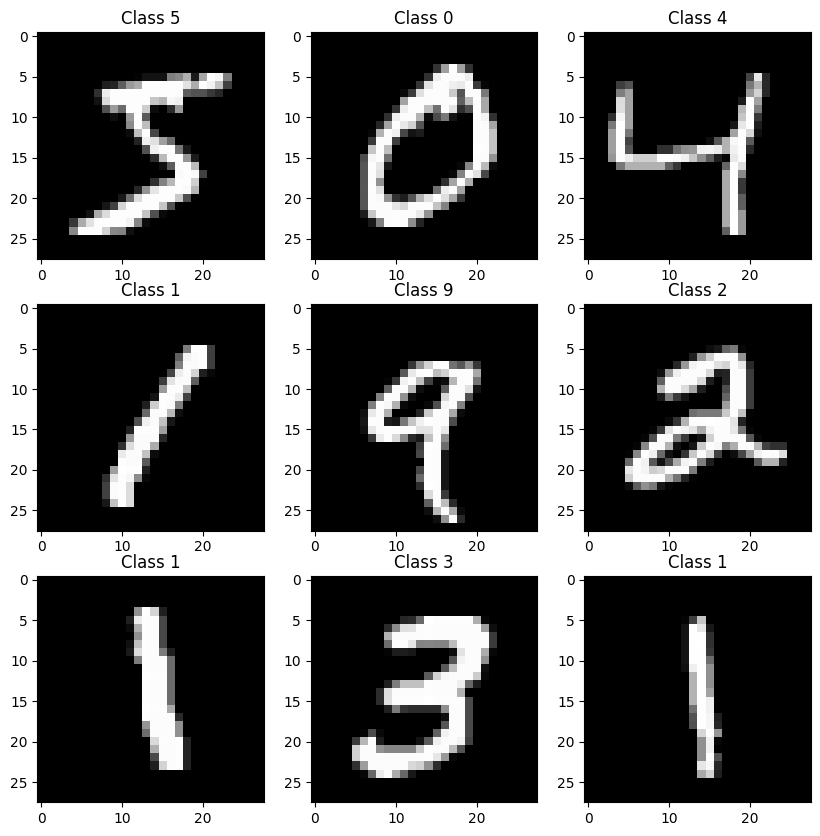

In [15]:
# Visualizamos algunos ejemplos del conjunto de datos
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i].argmax()))

Text(0.5, 1.0, 'Class 3')

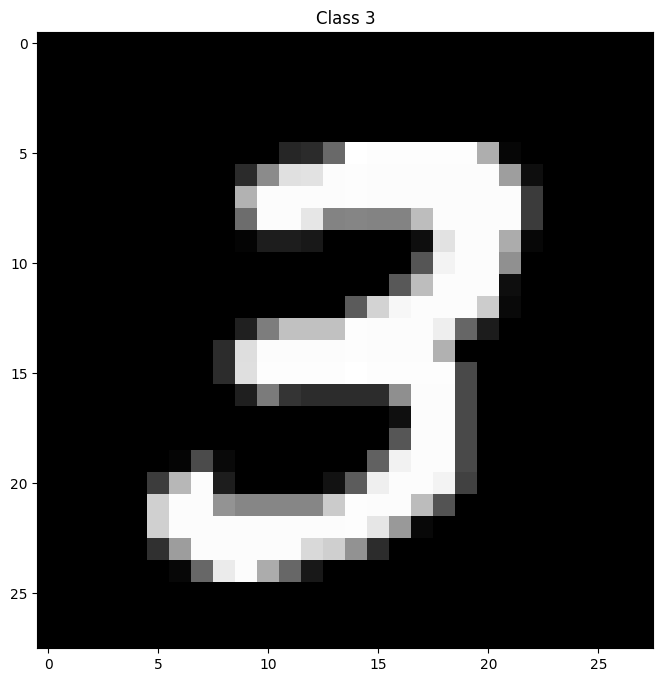

In [41]:
# Dibujar la imagen 3
plt.figure(figsize=(8, 8))
plt.imshow(x_train[7].reshape(28, 28), cmap='gray', interpolation='none')
plt.title('Class {}'.format(y_train[7].argmax()))


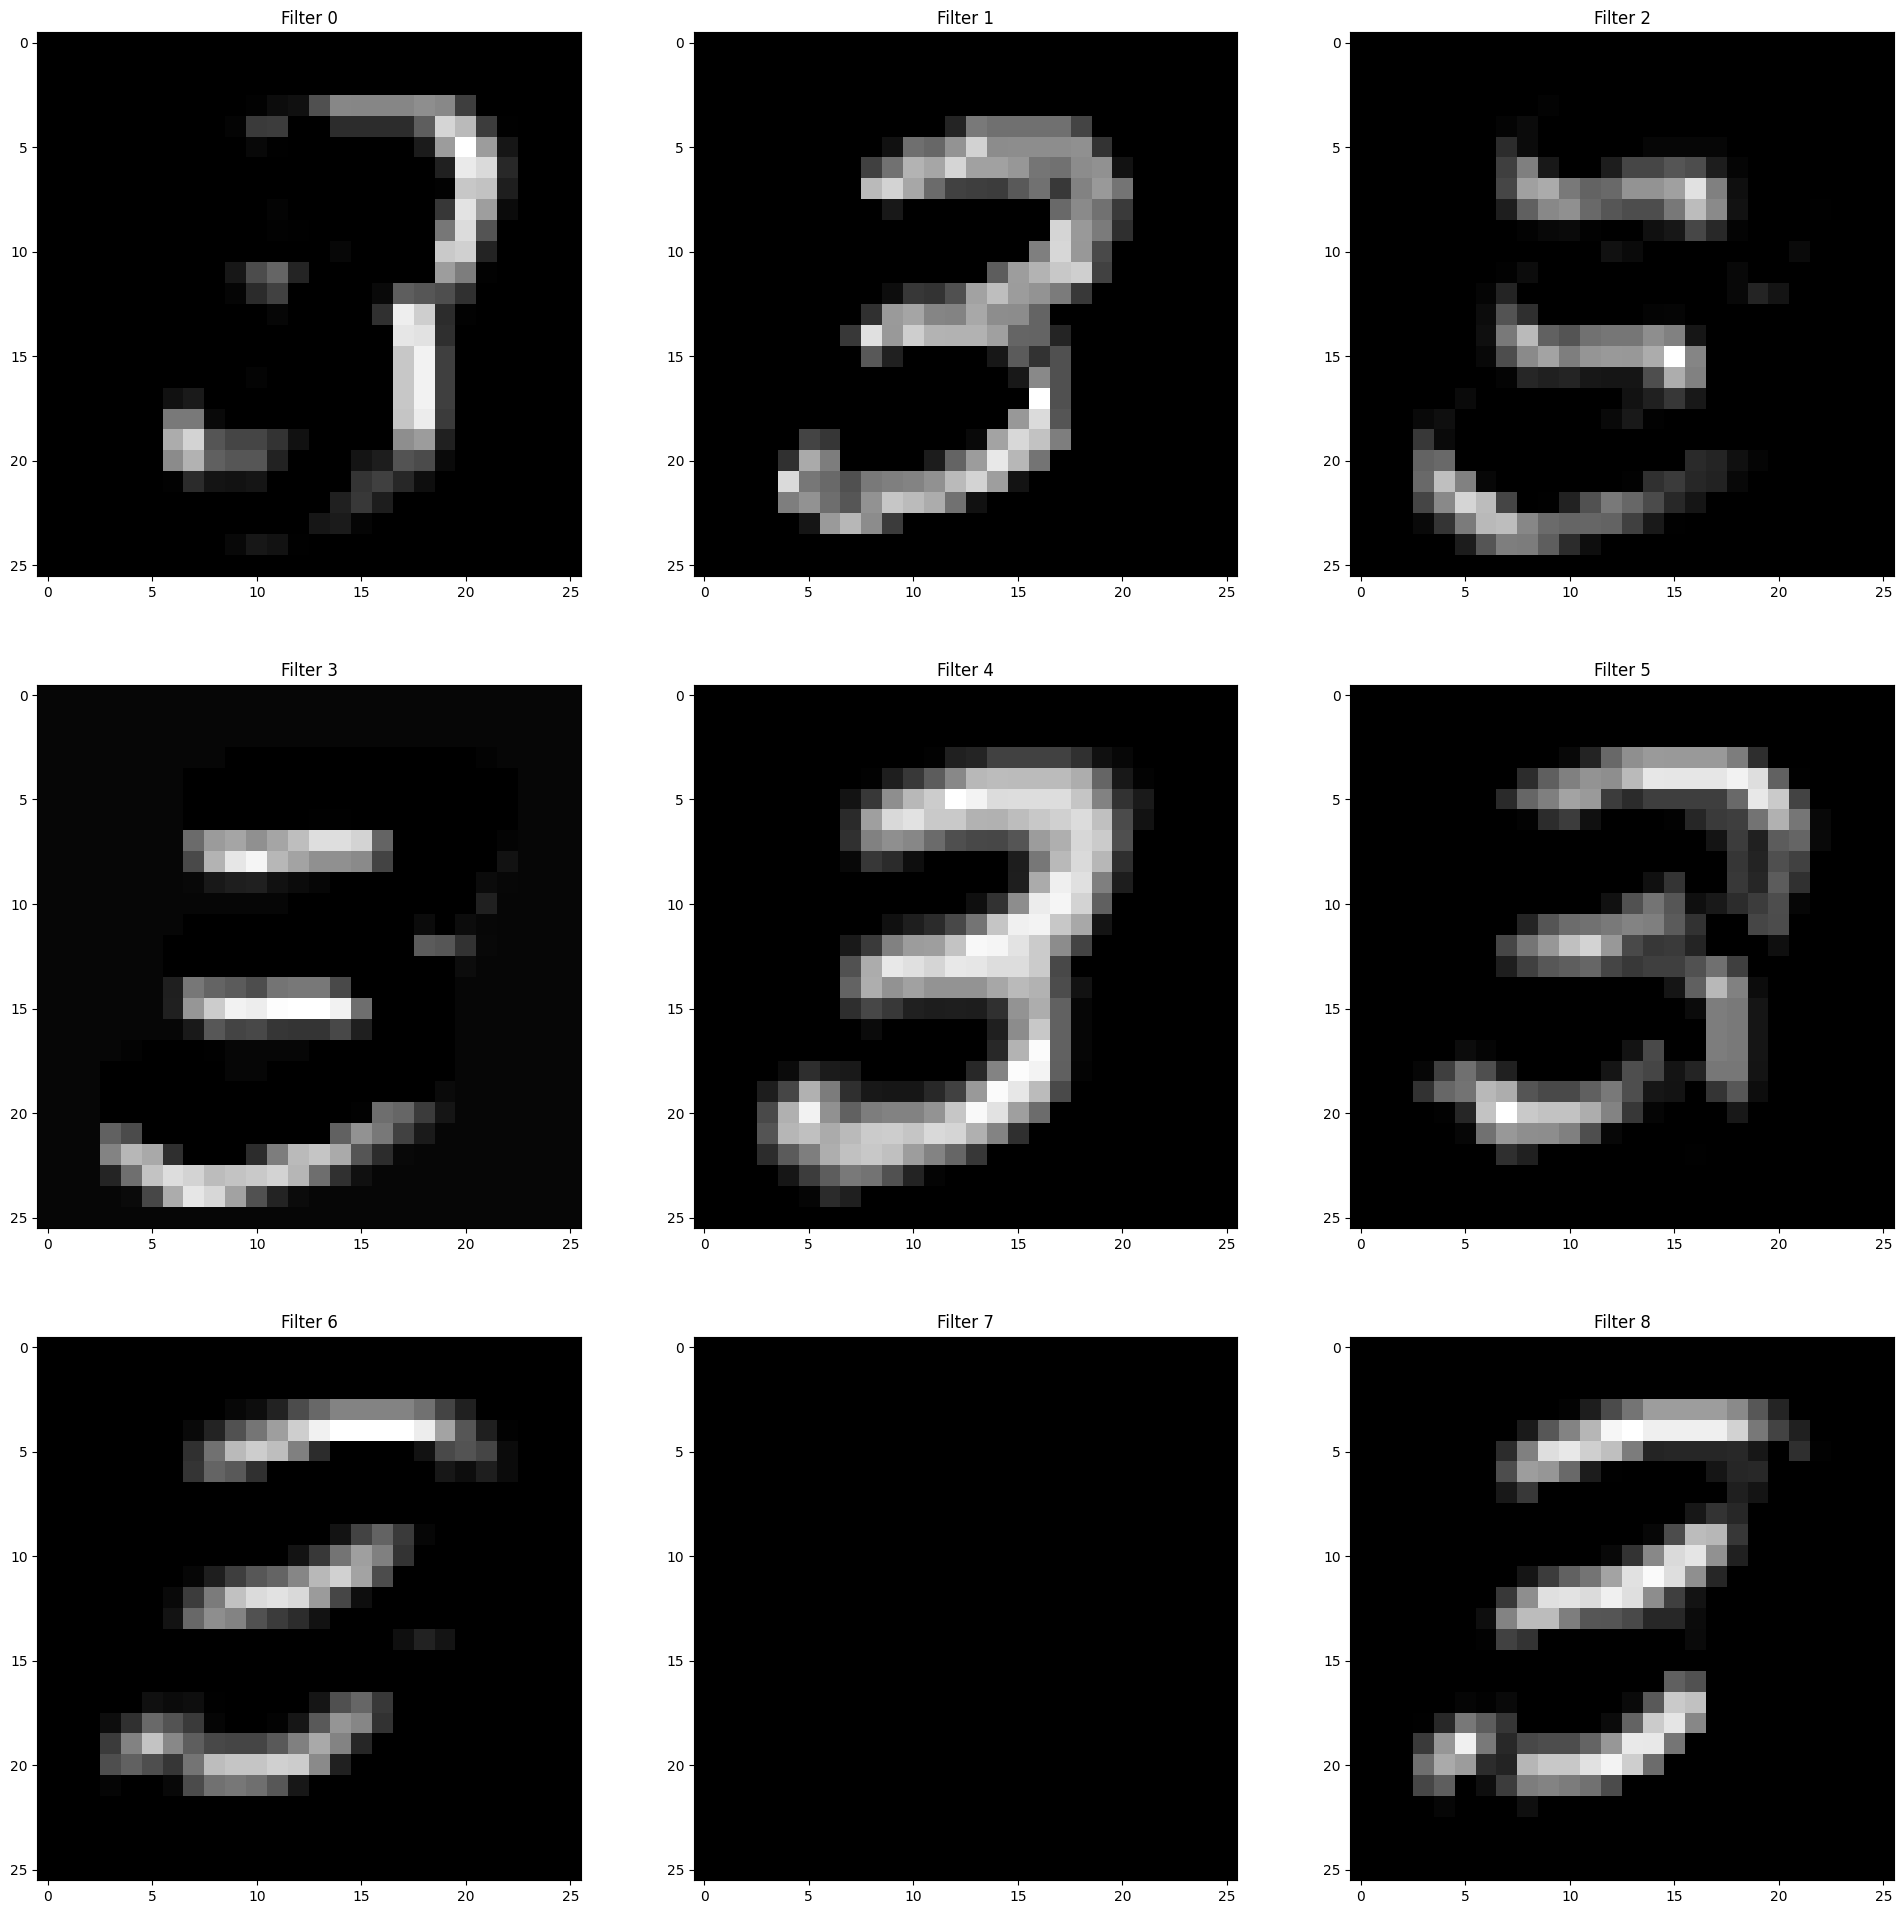

In [42]:
# Dibujar salida de la capa convolucional 1 para la imagen 7
from keras import backend as K
get_layer_output = K.function([model.layers[0].input], [model.layers[0].output])
layer_output = get_layer_output([x_train[7].reshape(1, 28, 28, 1)])[0]


# Visualizamos la salida de la capa convolucional 1
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 24))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(layer_output[0, :, :, i], cmap='gray', interpolation='none')
    plt.title('Filter {}'.format(i))


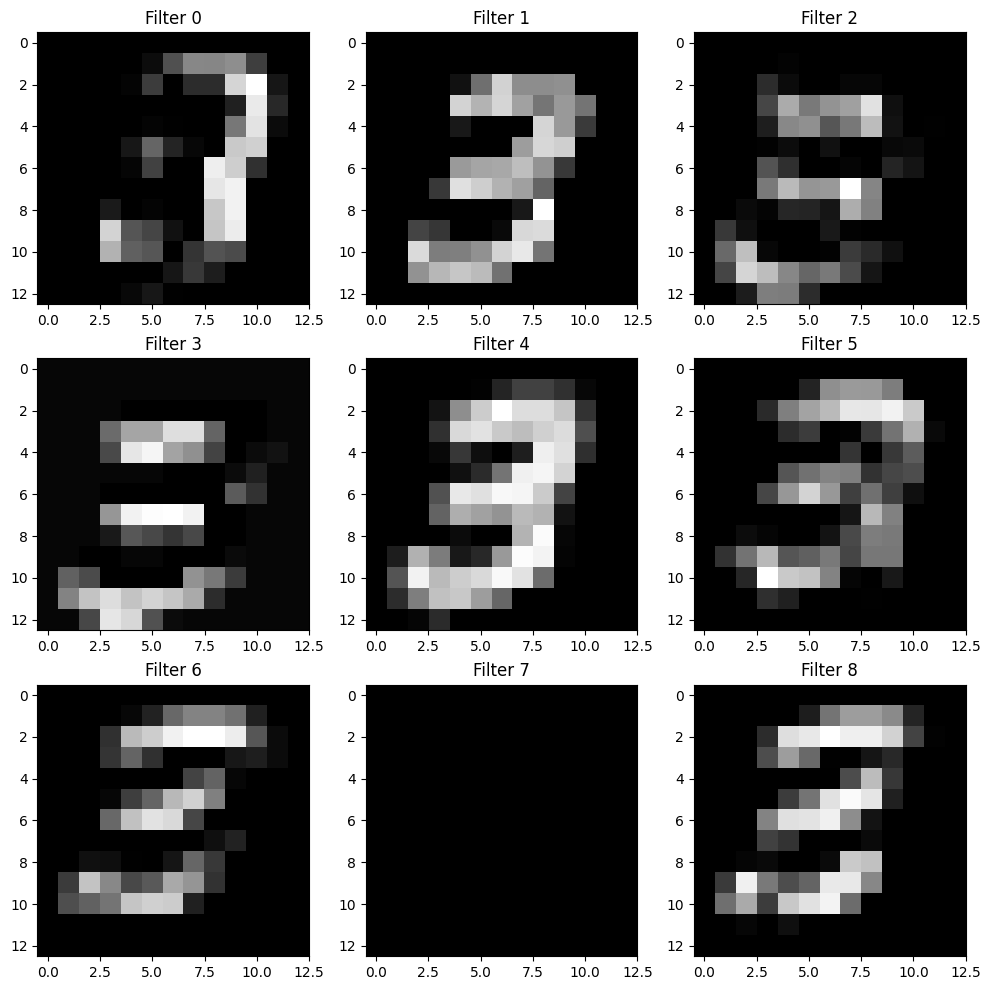

In [43]:
# Visualizamos la salida de la primera capa de max pooling
get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
layer_output = get_layer_output([x_train[7].reshape(1, 28, 28, 1)])[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(layer_output[0, :, :, i], cmap='gray', interpolation='none')
    plt.title('Filter {}'.format(i))


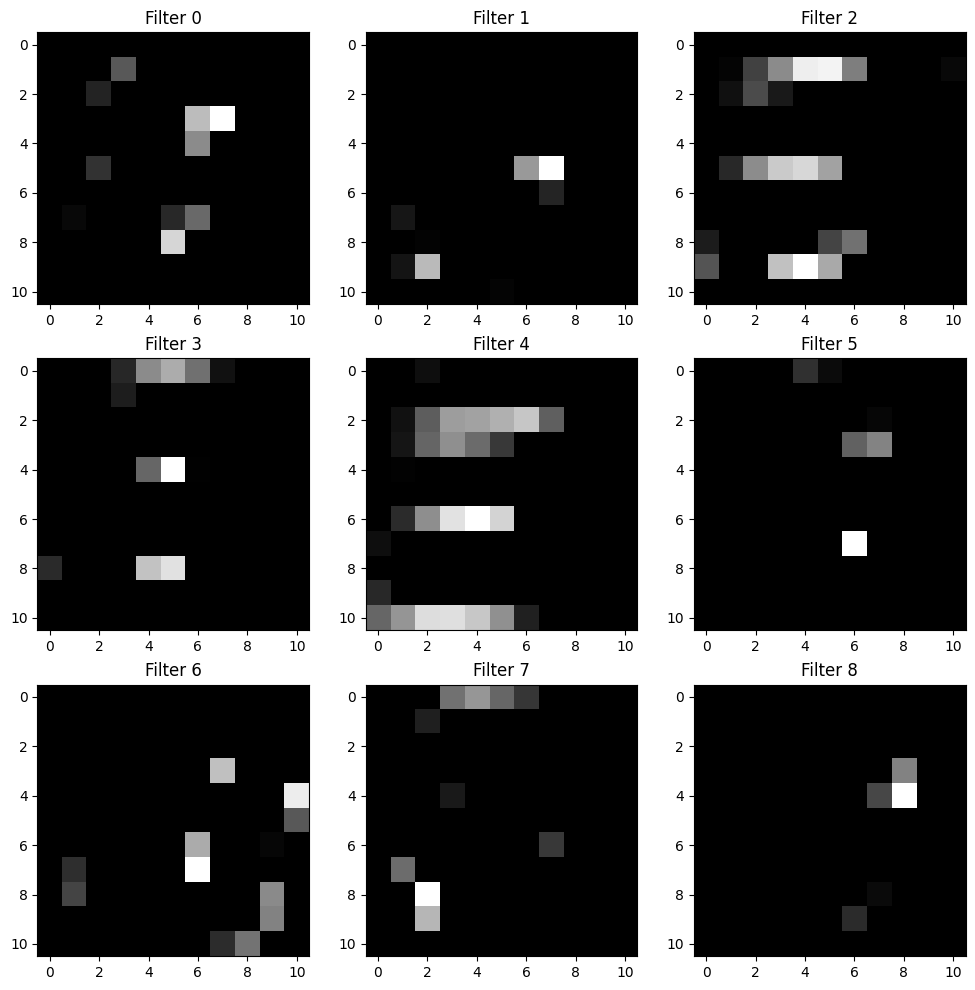

In [44]:
# Visualizamos la salida de la capa convolucional 2
get_layer_output = K.function([model.layers[0].input], [model.layers[2].output])
layer_output = get_layer_output([x_train[7].reshape(1, 28, 28, 1)])[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(layer_output[0, :, :, i], cmap='gray', interpolation='none')
    plt.title('Filter {}'.format(i))


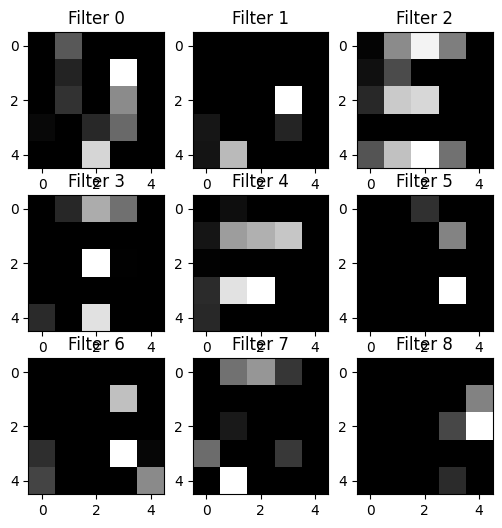

In [46]:
# Visualizamos la salida de la segunda capa de max pooling
get_layer_output = K.function([model.layers[0].input], [model.layers[3].output])
layer_output = get_layer_output([x_train[7].reshape(1, 28, 28, 1)])[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(layer_output[0, :, :, i], cmap='gray', interpolation='none')
    plt.title('Filter {}'.format(i))

# Procesado de texto con RNNs

## 1. Sentiment Analysis: IMDb movie reviews dataset

Vamos a utilizar TensorFlow para hacer sentiment analysis (análisis de sentimiento) de comentarios de películas de IMDb. 

El dataset que vamos a utilizar contiene 50.000 comentarios de películas de IMDb, etiquetados como positivos (1) o negativos (0). El dataset está dividido en 25.000 comentarios para entrenamiento y 25.000 comentarios para test.

Queremos entrenar un clasificador binario que, dado un comentario de una película, sea capaz de predecir si el comentario es positivo o negativo.

El funcionamiento del modelo será el siguiente:
1. El modelo recibe como entrada un comentario de una película.
2. Procesa el comentario palabra por palabra, y para cada una calcula un vector de características.
3. La secuencia de vectores de características pasa por la red, que devuelve un único vector de características que aglutina la información detectada.
4. La salida es la probabilidad de que el comentario sea positivo.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

El proceso de transformar un comentario en un vector de características se conoce como embedding. En este caso, vamos a utilizar un embedding preentrenado, que ha sido entrenado con un corpus de 100.000 palabras extraídas de los comentarios de IMDb. El embedding asigna a cada palabra un vector de 100 números reales.

Comenzamos definiendo los parámetros para el algoritmo:
- max_features: número máximo de palabras a considerar en el vocabulario. Las palabras que no aparezcan en el vocabulario se codificarán como 0.
- maxlen: longitud máxima de las secuencias de palabras. Las secuencias más largas se truncarán y las más cortas se rellenarán con ceros.
- batch_size: tamaño del batch.
- embedding_dim: dimensión del embedding.


In [ ]:
# Define parameters
max_features = 5000  # Number of most frequent words to keep
maxlen = 500  # Maximum sequence length
batch_size = 32
embedding_dim = 128

Cargamos el dataset desde Keras y utilizamos la función pad_sequences para rellenar las secuencias de palabras con ceros o truncarlas para que todas tengan la misma longitud.

In [8]:
# Load the IMDb dataset
(train_x_txt, train_y), (test_x_txt, test_y) = imdb.load_data(num_words=max_features)

# Preprocess the data
train_x = sequence.pad_sequences(train_x_txt, maxlen=maxlen)
test_x = sequence.pad_sequences(test_x_txt, maxlen=maxlen)

1641221/1641221 [==============================] - 0s 0us/step


In [13]:
# Prepare auxiliary variables to transform the data back to text
word_to_id = tf.keras.datasets.imdb.get_word_index()
index_offset = 3  # word index offset
word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value: key for key, value in word_to_id.items()}
train_x_decoded = list(
    map(lambda sentence: " ".join(id_to_word[i] for i in sentence), train_x_txt)
)
test_x_decoded = list(
    map(lambda sentence: " ".join(id_to_word[i] for i in sentence), test_x_txt)
)

In [12]:
# Print the shape of the data
print('Shape:', train_x.shape)

# Print the first example
print(train_x[0])
print(train_x[1])
print(train_x[0])
print(train_x[0])
print(train_x[0])

# Print the first example decoded
print(train_x_decoded[0])

Shape: (25000, 100)
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117    2   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
    2   18    4  226   22   21  134  476   26  480    5  144   30    2
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16    2   19
  178   32]
<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast <UNK> terrible performances the show is flat flat flat br br i don't know how michael <UNK> could have allowed this one on his <UNK> he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you <UNK> fans give this a miss


Por ejemplo, este es el efecto de truncar una secuencia a maxlen=5:

In [ ]:
# We use pad_sequences to make a single sequence of lenght 200 and show the result for the first review:
print(train_x[0])
example1 = sequence.pad_sequences([train_x[0]], maxlen=200)
print(example1)

Definimos el modelo, lo compilamos, entrenamos y evaluamos con los datos de test:

In [1]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_x, train_y, epochs=5, batch_size=batch_size, validation_data=(test_x, test_y))

# Evaluate the model on test data
loss, accuracy = model.evaluate(test_x, test_y)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


17464789/17464789 [==============================] - 10s 1us/step
Epoch 1/5
782/782 [==============================] - 107s 135ms/step - loss: 0.4307 - accuracy: 0.7993 - val_loss: 0.3526 - val_accuracy: 0.8458
Epoch 2/5
782/782 [==============================] - 100s 128ms/step - loss: 0.3007 - accuracy: 0.8756 - val_loss: 0.3818 - val_accuracy: 0.8404
Epoch 3/5
782/782 [==============================] - 100s 128ms/step - loss: 0.2393 - accuracy: 0.9054 - val_loss: 0.3549 - val_accuracy: 0.8534
Epoch 4/5
782/782 [==============================] - 101s 130ms/step - loss: 0.1945 - accuracy: 0.9242 - val_loss: 0.3992 - val_accuracy: 0.8434
Epoch 5/5
782/782 [==============================] - 23s 29ms/step - loss: 0.4281 - accuracy: 0.8369
Test Loss: 0.4281, Test Accuracy: 0.8369


Por último, mostramos el resultado para algunos ejemplos:

In [17]:
# We print the review, the label and the prediction for the first 5 reviews in the test set:
for i in range(3):
    print('Review:\n', test_x_txt[i])
    print('Codified review:\n', test_x[i])
    print('Decodified review:\n', test_x_decoded[i])
    print('Label:', test_y[i], 'Predicted:', np.argmax(model.predict(test_x[i:i+1])))
    print()

Review:
 [1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 1668, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 717]
Codified review:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1  591  202   14   31    6  717   10   10    2
    2    5    4  360    7    4  177    2  394  354    4  123    9 1035
 1035 1035   10   10   13   92  124   89  488    2  100   28 1668   14
   31   23   27    2   29  220  468    8  124   14  286  170    8  157
   46    5   27  239   16  179    2   38   32   25    2  451  202   14
    6  717]
Decodified review:
 <START> please give this one a miss br br <UNK> <UNK> and the rest of the cast <UNK> terrible performances the show is flat flat flat br br i don't know how mic

Label: 0 Predicted: 0

Review:
 [1, 14, 22, 3443, 6, 176, 7, 2, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 2, 2, 4, 2, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 2, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 2, 2, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 2, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 2, 185, 132, 1988, 2, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 976, 2078, 7, 2, 861, 2, 5, 4182, 30, 3127, 2, 56, 4, 841, 5, 990, 692, 8, 4, 1669, 398, 229, 10, 10, 13, 2822, 670, 2, 14, 9, 31, 7, 27, 111, 108, 15, 2033, 19, 2, 1429, 875, 551, 14, 22, 9, 1193, 21, 45, 4829, 5, 45, 252, 8, 2, 6, 565, 921, 3639, 39, 4, 529, 48, 25, 181, 8, 67

## 2. Text generation: Shakespeare dataset

En este ejercicio vamos a entrenar un modelo para generar texto, utilizando el dataset de obras de Shakespeare.

El dataset contiene 111 obras de Shakespeare, con un total de 5.379.440 caracteres. El objetivo es entrenar un modelo que, dado un carácter, sea capaz de predecir el siguiente carácter.

In [40]:
import tensorflow as tf
import numpy as np
import random
import string

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

Descargamos el dataset y lo preparamos para el entrenamiento:

In [41]:
# Load the Shakespeare dataset
shakespeare_data = tf.keras.utils.get_file(
    'shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt'
)

# Read the text
with open(shakespeare_data, 'r', encoding='utf-8') as f:
    text = f.read()

# Create a vocabulary of unique characters
chars = sorted(set(text))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}
vocab_size = len(chars)

# Create sequences of fixed length for training
seq_length = 100
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, 1):
    sequences.append(text[i:i+seq_length])
    next_chars.append(text[i+seq_length])

# Vectorize the data
X = np.zeros((len(sequences), seq_length, vocab_size), dtype=bool)
y = np.zeros((len(sequences), vocab_size), dtype=bool)

for i, sequence in enumerate(sequences):
    for t, char in enumerate(sequence):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

Construimos el modelo y lo entrenamos:

In [43]:
# Build an RNN model for text generation
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(seq_length, vocab_size)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')

# Function to sample the next character based on the model's predictions
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Train the model
epochs = 2 #30
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    model.fit(X, y, batch_size=128, epochs=1)

    # Generate text at the end of each epoch
    start_index = random.randint(0, len(text) - seq_length - 1)
    generated_text = text[start_index:start_index+seq_length]

    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print(f'----- Temperature: {temperature} -----')
        print(generated_text, end='')

        for i in range(400):
            sampled = np.zeros((1, seq_length, vocab_size))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_to_idx[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_char = idx_to_char[sample(preds, temperature)]
            generated_text += next_char
            generated_text = generated_text[1:]

            print(next_char, end='')
        print('\n')


Epoch 1/2
8714/8714 [==============================] - 1964s 225ms/step - loss: 2.0943
----- Temperature: 0.2 -----

Away with the joint-stools, remove the
court-cupboard, look to the plate. Good thou, save
me a piece and she have and the seart the hand
And she have and the stard and the pares and the sear
The rest the sear the stard the have of the sond
And the sear the sone the sear the sone and grains
And and the sear the stand the sear the propes the singed
And she with the sear the sear the stard and sore the rares
The seart and the shall the rest the stard the sare
The prome of the can the rest and sand

----- Temperature: 0.5 -----
the rares
The seart and the shall the rest the stard the sare
The prome of the can the rest and sand the shear of thee,
And so de with the stand the kence dare to sin
And the sert that make the song and in the swaid.

BENVOLO:
That shast of the mare I but me come,
I'll so deer the starding him disterse.

Second RIOND:
Are a fort thou dave the rown the

Usamos el modelo entrenado para generar texto:

In [44]:
# Load the trained model (ensure you've trained it first)
#model = tf.keras.models.load_model('shakespeare_text_generation_model.h5')

# Function to generate text given a seed text
def generate_text(seed_text, num_chars_to_generate=400, temperature=0.5):
    generated_text = seed_text

    for _ in range(num_chars_to_generate):
        sampled = np.zeros((1, seq_length, vocab_size))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_to_idx[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_char = idx_to_char[sample(preds, temperature)]
        generated_text += next_char
        generated_text = generated_text[1:]

    return generated_text

# Seed text for generation
seed_text = "To be or not to be, that is the question:"

# Generate text
generated_text = generate_text(seed_text, num_chars_to_generate=400, temperature=0.5)
print(generated_text)




i
 uaiieaas

itei
o
e
e
i
e
i

eaea,





# Generación de música con LSTM

Vamos a utilizar una red neuronal recurrente para generar música. Para ello, vamos a utilizar el dataset de música de Bach, que contiene 352 piezas de música de Bach en formato MIDI.

Comenzamos importando los paquetes necesarios:

El ejercicio completo puede encontrarse en el siguiente enlace:

https://www.tensorflow.org/tutorials/audio/music_generation

In [1]:
import collections
import datetime
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

Y configuramos los parámetros para el entrenamiento

In [2]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

Vamos a utilizar el 'maestro' dataset, que consiste en 352 piezas de música de Bach en formato MIDI. Cada pieza tiene una longitud de 1024 pasos de tiempo. Cada paso de tiempo contiene 128 valores, uno por cada nota posible. El valor de cada nota es 0 si la nota no está sonando en ese momento, o un número entre 1 y 127 si la nota está sonando. El valor 128 se reserva para indicar que no hay más notas en ese paso de tiempo.

In [3]:
data_dir = pathlib.Path('data/maestro-v2.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v2.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

In [4]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 1282


Vamos a comenzar "visualizando" un único archivo. Usamos pretty_midi para leer el archivo MIDI y extraer la información de las notas. A continuación, usamos librosa para convertir la información de las notas en un espectrograma, que es una representación visual de las notas que se están tocando en cada momento.

In [14]:
sample_file = filenames[1]
print(sample_file)

pm = pretty_midi.PrettyMIDI(sample_file)

def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
    waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
    # Take a sample of the generated waveform to mitigate kernel resets
    waveform_short = waveform[:seconds*_SAMPLING_RATE]
    return display.Audio(waveform_short, rate=_SAMPLING_RATE)


data\maestro-v2.0.0\2004\MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi


In [ ]:
display_audio(pm)

El objeto MIDI contiene cierta información sobre la pieza, por ejemplo número de instrumentos y su nombre.

Además, podemos extraer y visualizar las notas y sus parámetros.

In [17]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

for i, note in enumerate(instrument.notes[:10]):
    note_name = pretty_midi.note_number_to_name(note.pitch)
    duration = note.end - note.start
    print(f'{i}: pitch={note.pitch}, note_name={note_name},'
    f' duration={duration:.4f}')






Number of instruments: 1
Instrument name: Acoustic Grand Piano
0: pitch=31, note_name=G1, duration=0.0656
1: pitch=43, note_name=G2, duration=0.0792
2: pitch=44, note_name=G#2, duration=0.0740
3: pitch=32, note_name=G#1, duration=0.0729
4: pitch=34, note_name=A#1, duration=0.0708
5: pitch=46, note_name=A#2, duration=0.0948
6: pitch=48, note_name=C3, duration=0.6260
7: pitch=36, note_name=C2, duration=0.6542
8: pitch=53, note_name=F3, duration=1.7667
9: pitch=56, note_name=G#3, duration=1.7688


In [18]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
    pm = pretty_midi.PrettyMIDI(midi_file)
    instrument = pm.instruments[0]
    notes = collections.defaultdict(list)

    # Sort the notes by start time
    sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
    prev_start = sorted_notes[0].start

    for note in sorted_notes:
        start = note.start
        end = note.end
        notes['pitch'].append(note.pitch)
        notes['start'].append(start)
        notes['end'].append(end)
        notes['step'].append(start - prev_start)
        notes['duration'].append(end - start)
        prev_start = start

    return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,43,1.032292,1.111458,0.000000,0.079167
1,31,1.040625,1.106250,0.008333,0.065625
2,44,1.142708,1.216667,0.102083,0.073958
3,32,1.144792,1.217708,0.002083,0.072917
4,46,1.208333,1.303125,0.063542,0.094792


In [19]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['G2', 'G1', 'G#2', 'G#1', 'A#2', 'A#1', 'C3', 'C2', 'F3', 'D4'],
      dtype='<U3')

### Visualizaciones

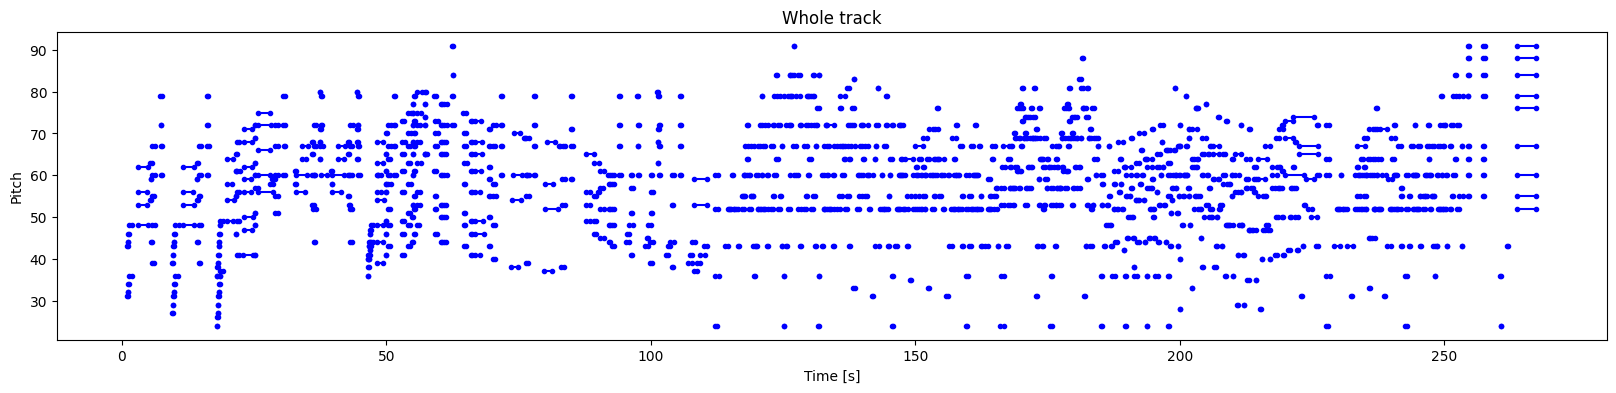

In [40]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
    if count:
        title = f'First {count} notes'
    else:
        title = f'Whole track'
        count = len(notes['pitch'])
    plt.figure(figsize=(20, 4))
    plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
    plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
    plt.plot(
        plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
    plt.xlabel('Time [s]')
    plt.ylabel('Pitch')
    _ = plt.title(title)

plot_piano_roll(raw_notes)

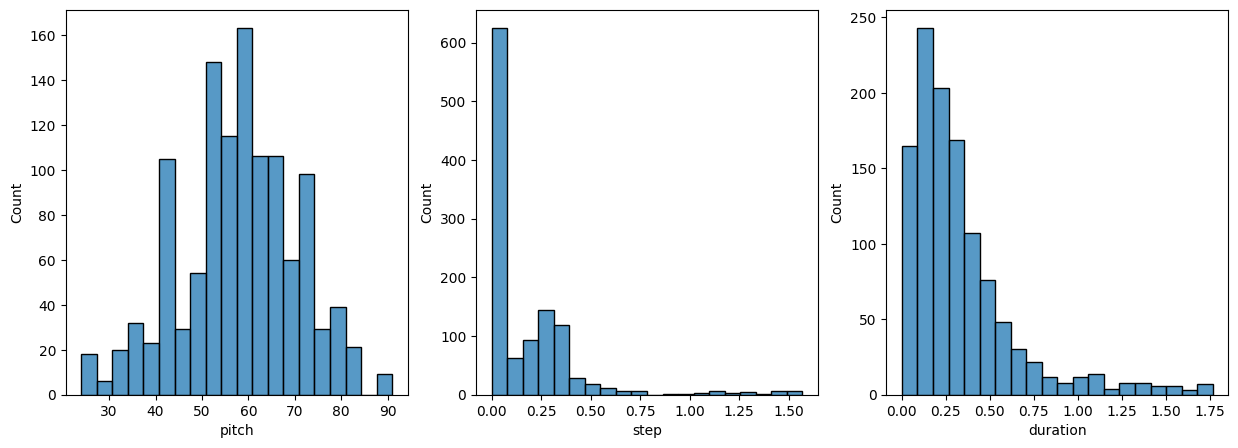

In [41]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
    plt.figure(figsize=[15, 5])
    plt.subplot(1, 3, 1)
    sns.histplot(notes, x="pitch", bins=20)

    plt.subplot(1, 3, 2)
    max_step = np.percentile(notes['step'], 100 - drop_percentile)
    sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

    plt.subplot(1, 3, 3)
    max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
    sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

plot_distributions(raw_notes)

In [ ]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

### Entrenamiento

El proceso de procesado y entrenamiento tarda bastante, comenzamos con solo 5 archivos.

In [20]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
    notes = midi_to_notes(f)
    all_notes.append(notes)

all_notes = pd.concat(all_notes)

n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 37241


In [21]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

La red se entrena en lotes de secuencias de notas. Cada ejemplo consiste en una secuencia de notas como características de entrada y la siguiente nota como etiqueta. Por ejemplo, si la secuencia de entrada es [60, 62, 64], la etiqueta pudiera ser 65.

Se define una "ventana" que crea conjuntos de notas que pasar como características.

In [22]:
def create_sequences(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
    """Returns TF Dataset of sequence and label examples."""
    seq_length = seq_length+1

    # Take 1 extra for the labels
    windows = dataset.window(seq_length, shift=1, stride=1,
                                drop_remainder=True)

    # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
    flatten = lambda x: x.batch(seq_length, drop_remainder=True)
    sequences = windows.flat_map(flatten)

    # Normalize note pitch
    def scale_pitch(x):
      x = x/[vocab_size,1.0,1.0]
      return x

    # Split the labels
    def split_labels(sequences):
      inputs = sequences[:-1]
      labels_dense = sequences[-1]
      labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

      return scale_pitch(inputs), labels

    return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [25]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
print(seq_ds.element_spec)
print()

for seq, target in seq_ds.take(1):
    print('sequence shape:', seq.shape)
    print('sequence elements (first 10):', seq[0: 10])
    print()
    print('target:', target)


(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.5546875  0.         0.096875  ]
 [0.4296875  0.18645833 0.21770833]
 [0.5546875  0.009375   0.50520833]
 [0.4609375  0.175      0.16770833]
 [0.484375   0.16979167 0.11979167]
 [0.5625     0.153125   0.04166667]
 [0.5234375  0.01666667 0.196875  ]
 [0.578125   0.18020833 0.11458333]
 [0.4453125  0.         0.53958333]
 [0.5625     0.05416667 0.06875   ]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=59.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.008333333333333304>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.15937500000000027>}


In [27]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

print(train_ds.element_spec)

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None), {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})


Vamos a definir una función específica para las pérdidas. La función mse_with_positive_pressure es una versión modificada del Error Cuadrático Medio (MSE). Esta versión modifica el MSE al incluir un término llamado "presión positiva" que fomenta que las predicciones del modelo sean mayores o iguales a cero.

In [28]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
    mse = (y_true - y_pred) ** 2
    positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
    return tf.reduce_mean(mse + positive_pressure)

A continuación "construimos" el modelo a utilizar.

In [29]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25, 3)]              0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128)                  67584     ['input_1[0][0]']             
                                                                                                  
 duration (Dense)            (None, 1)                    129       ['lstm[0][0]']                
                                                                                                  
 pitch (Dense)               (None, 128)                  16512     ['lstm[0][0]']                
                                                                                              

In [30]:
losses = model.evaluate(train_ds, return_dict=True)
losses

581/581 [==============================] - 6s 6ms/step - loss: 5.0582 - duration_loss: 0.1655 - pitch_loss: 4.8507 - step_loss: 0.0420


{'loss': 5.058218002319336,
 'duration_loss': 0.1655091643333435,
 'pitch_loss': 4.850700855255127,
 'step_loss': 0.042008474469184875}

In [31]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

In [32]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [33]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50


581/581 [==============================] - 12s 18ms/step - loss: 0.3236 - duration_loss: 0.0845 - pitch_loss: 4.0267 - step_loss: 0.0377
Epoch 2/50
581/581 [==============================] - 13s 22ms/step - loss: 0.3112 - duration_loss: 0.0815 - pitch_loss: 3.9061 - step_loss: 0.0344
Epoch 3/50
581/581 [==============================] - 12s 20ms/step - loss: 0.3078 - duration_loss: 0.0805 - pitch_loss: 3.8646 - step_loss: 0.0341
Epoch 4/50
581/581 [==============================] - 12s 21ms/step - loss: 0.3042 - duration_loss: 0.0797 - pitch_loss: 3.8191 - step_loss: 0.0336
Epoch 5/50
581/581 [==============================] - 13s 22ms/step - loss: 0.3021 - duration_loss: 0.0786 - pitch_loss: 3.8010 - step_loss: 0.0334
Epoch 6/50
581/581 [==============================] - 12s 21ms/step - loss: 0.3006 - duration_loss: 0.0781 - pitch_loss: 3.7901 - step_loss: 0.0330
Epoch 7/50
581/581 [==============================] - 13s 23ms/step - loss: 0.2978 - duration_loss: 0.0766 - pitch_loss: 3.

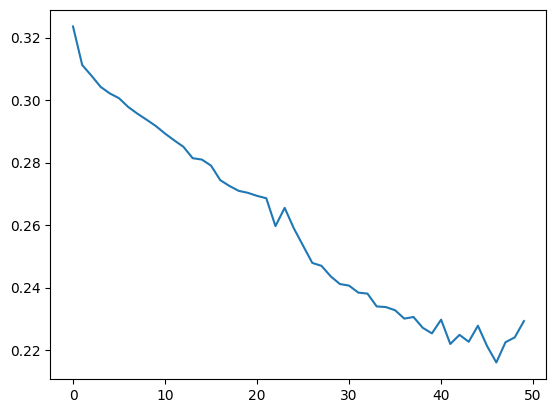

In [34]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

### Generación de música

Con el modelo entrenado, preparamos una función para predecir notas.

In [35]:
def predict_next_note(
    notes: np.ndarray, 
    model: tf.keras.Model, 
    temperature: float = 1.0) -> tuple[int, float, float]:
    
    """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

    assert temperature > 0

    # Add batch dimension
    inputs = tf.expand_dims(notes, 0)

    predictions = model.predict(inputs)
    pitch_logits = predictions['pitch']
    step = predictions['step']
    duration = predictions['duration']

    pitch_logits /= temperature
    pitch = tf.random.categorical(pitch_logits, num_samples=1)
    pitch = tf.squeeze(pitch, axis=-1)
    duration = tf.squeeze(duration, axis=-1)
    step = tf.squeeze(step, axis=-1)

    # `step` and `duration` values should be non-negative
    step = tf.maximum(0, step)
    duration = tf.maximum(0, duration)

    return int(pitch), float(step), float(duration)

In [38]:
def notes_to_midi(
    notes: pd.DataFrame,
    out_file: str, 
    instrument_name: str,
    velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(
        program=pretty_midi.instrument_name_to_program(
            instrument_name))

    prev_start = 0
    for i, note in notes.iterrows():
        start = float(prev_start + note['step'])
        end = float(start + note['duration'])
        note = pretty_midi.Note(
            velocity=velocity,
            pitch=int(note['pitch']),
            start=start,
            end=end,
        )
        instrument.notes.append(note)
        prev_start = start

    pm.instruments.append(instrument)
    pm.write(out_file)
    return pm

In [36]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
    pitch, step, duration = predict_next_note(input_notes, model, temperature)
    start = prev_start + step
    end = start + duration
    input_note = (pitch, step, duration)
    generated_notes.append((*input_note, start, end))
    input_notes = np.delete(input_notes, 0, axis=0)
    input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
    prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

generated_notes.head(10)

1/1 [==============================] - 0s 19ms/step


,pitch,step,duration,start,end
0,80,1.863949,0.396251,1.863949,2.260200
1,98,0.154006,0.945911,2.017955,2.963866
2,84,0.172127,1.220524,2.190082,3.410606
3,95,0.179145,1.262537,2.369227,3.631765
4,84,0.186900,1.269410,2.556128,3.825538
5,60,0.185651,1.272347,2.741778,4.014125
6,90,0.185037,1.291849,2.926815,4.218664
7,42,0.179563,1.285245,3.106378,4.391624
8,94,0.191824,1.265282,3.298203,4.563485
9,79,0.178584,1.288542,3.476786,4.765328


In [ ]:
out_file = 'data/output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)

#display_audio(out_pm)